In [2]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.filterwarnings('ignore')

# 1.1 File Processing

As we are given arff file, we are converting this to CSV, so that we can easily read the data using pandas

In [3]:
# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent


In [4]:
with open("Behavior of the urban traffic - modified.arff" , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

In [5]:
data = pd.read_csv("Behavior of the urban traffic - modified.csv")

# 1.2 Data Preprocessing

 As part of Data Preprocessing step we do the following steps:
        1)Understand the data 
        2)Replace missing values with appropriate methods
        3)Understand outliers using different graphs
        4)Remove outliers using proper techniques
        5)Converting all the data from int/float

In [6]:
data.describe(include = 'all')
data_working = data.copy()
data_working.describe(include = 'all')

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
count,140,140.000000,140.000000,140,140,140,140,140.000000,140,140.000000,140.000000,140.000000,140.000000,140,140.000000,140,140.000000,140.000000
unique,27,NaN,NaN,3,6,5,3,NaN,3,NaN,NaN,NaN,NaN,6,NaN,5,NaN,NaN
top,11:00,NaN,NaN,F,0.0,0.0,NO,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
freq,6,NaN,NaN,128,91,124,138,NaN,137,NaN,NaN,NaN,NaN,118,NaN,125,NaN,NaN
mean,NaN,0.335714,8.007143,NaN,NaN,NaN,NaN,0.007143,NaN,0.114286,0.007143,14.400000,0.035714,NaN,0.042857,NaN,0.014286,9.980714
std,NaN,0.652728,84.448912,NaN,NaN,NaN,NaN,0.084515,NaN,0.495820,0.084515,169.022573,0.221529,NaN,0.203262,NaN,0.119092,4.323583
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,-1.000000,NaN,0.000000,NaN,0.000000,3.400000
25%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,7.300000
50%,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,8.950000
75%,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,11.500000


In [7]:
missing_data_columns = data_working.columns[data_working.eq(' ').any()].tolist()
missing_data_columns

['Accident_victim',
 'Incident_involving_dangerous_freight',
 'Defect_in_the_network_of_trolleybuses',
 'Semaphore_off']

As we have seen above, we have  ['Accident_victim', 'Incident_involving_dangerous_freight','Defect_in_the_network_of_trolleybuses', 'Semaphore_off'] having null values. Let us validate each column and find how to replace them.

Accident_victim: It says about number of accidents happened which is a quantitative numerical attribute and which is discrete. As this can play an important role in the slowness of traffic, we are replacing this value with mean.

Incident_involving_dangerous_freight: It says about the accidents involving dangerous freights which is again a quantitative attribute and which is discrete. According to the data we have seen less incidents, so we are replacing with mean

Defect_in_the_network_of_trolleybuses: It says about number of incidents happened due to defect in the network of trolley buses which is again quantitative attribute and which is discrete. Hence we are using mean to replace the data

Semaphore_off: It talks about the number of traffic signals not functioning, which is again quantitative attribute and which is discrete. Hence we are using mean to replace the data

In [8]:
#Calculating mean of each column and replacing the emty values
mean = float(np.mean(data_working['Accident_victim'].notnull()))
data_working['Accident_victim'].replace(" ", float(mean), inplace = True)
data_working['Accident_victim'] = data_working['Accident_victim'].astype(float)
mean = np.mean(data_working['Incident_involving_dangerous_freight'].notnull())
data_working['Incident_involving_dangerous_freight'].replace(" ", float(mean), inplace = True)
data_working['Incident_involving_dangerous_freight'] = data_working['Incident_involving_dangerous_freight'].astype(float)
mean = np.mean(data['Defect_in_the_network_of_trolleybuses'].notnull())
data_working['Defect_in_the_network_of_trolleybuses'].replace(" ", float(mean), inplace = True)
data_working['Defect_in_the_network_of_trolleybuses'] = data_working['Defect_in_the_network_of_trolleybuses'].astype(float)
mean = np.mean(data_working['Semaphore_off'].notnull())
data_working['Semaphore_off'].replace(" ", float(mean), inplace = True)
data_working['Semaphore_off'] = data_working['Semaphore_off'].astype(float)

In [9]:
#Changing all the values to Numerical values
def getUniqueValuesOfEachColumn():
    for col in data_working.columns:
        print(col, data_working[col].unique())
getUniqueValuesOfEachColumn()

Hour ['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
Immobilized_bus [0. 2. 1. 4.]
Broken_Truck [   0. 1000.    2.    1.    5.    4.    3.]
Vehicle_excess [' T' ' F' ' f']
Accident_victim [0. 1. 2. 3.]
Running_over [' 0.0' ' NO' ' 1.0' ' 2.0' ' -1.0']
Fire_vehicles [' NO' ' 0.0' ' YES']
Occurrence_involving_freight [0. 1.]
Incident_involving_dangerous_freight [0. 1.]
Lack_of_electricity [0. 1. 2. 4. 3.]
Fire [0. 1.]
Point_of_flooding [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00]
Manifestations [ 0.  1. -1.]
Defect_in_the_network_of_trolleybuses [ 0.  1.  3.  2. -8.]
Tree_on_the_road [0. 1.]
Semaphore_off [0. 1. 2. 4.]
Intermittent_Semaphore [0. 1.]
Slowness_in_traffic_percent [ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.7  4.8  4.9
  5.1  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.
 10.3  7.9  7.7  

Here we observe that Vehicle_excess has T,F,f which are categorical values need to be converted. 
Running Over has NO, which needs to be converted. 
Fire vehicles needs to be converted.
Let us try to convert all these values to numerical and see

In [10]:
data_working['Vehicle_excess'] = data_working['Vehicle_excess'].astype(str).str.strip()
data_working['Vehicle_excess'].replace('T', 1, inplace = True)
data_working['Vehicle_excess'].replace('F', 0, inplace = True)
data_working['Vehicle_excess'].replace('f', 0, inplace = True)

In [11]:
data_working['Running_over'] = data_working['Running_over'].astype(str).str.strip()
data_working['Running_over'].replace('NO', 0.0, inplace = True)

In [12]:
data_working['Fire_vehicles'] = data_working['Fire_vehicles'].astype(str).str.strip()
data_working['Fire_vehicles'].replace('NO', 0.0, inplace = True)
data_working['Fire_vehicles'].replace('YES', 1.0, inplace = True)

In [13]:
getUniqueValuesOfEachColumn()

Hour ['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
Immobilized_bus [0. 2. 1. 4.]
Broken_Truck [   0. 1000.    2.    1.    5.    4.    3.]
Vehicle_excess [1 0]
Accident_victim [0. 1. 2. 3.]
Running_over ['0.0' 0.0 '1.0' '2.0' '-1.0']
Fire_vehicles [0.0 '0.0' 1.0]
Occurrence_involving_freight [0. 1.]
Incident_involving_dangerous_freight [0. 1.]
Lack_of_electricity [0. 1. 2. 4. 3.]
Fire [0. 1.]
Point_of_flooding [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00]
Manifestations [ 0.  1. -1.]
Defect_in_the_network_of_trolleybuses [ 0.  1.  3.  2. -8.]
Tree_on_the_road [0. 1.]
Semaphore_off [0. 1. 2. 4.]
Intermittent_Semaphore [0. 1.]
Slowness_in_traffic_percent [ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.7  4.8  4.9
  5.1  5.3  6.9  6.7  8.1  9.5  9.4  9.9 11.2 11.8 11.4  7.4  6.3  8.
 10.3  7.9  7.7  8.5  7.8  8.4  9.3 11. 

We see all the categorical values are converted to numerical values, let us convert hour value to float now

In [14]:
data_working['Hour']= data_working['Hour'].replace(':','.', regex=True).astype("float")
data_working['Running_over'] = data_working['Running_over'].astype('float')
data_working['Fire_vehicles'] = data_working['Fire_vehicles'].astype('float')

In [15]:
data_working.tail(15)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
125,13.3,0.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.7
126,14.0,1.0,2.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.3
127,14.3,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
128,15.0,0.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.9
129,15.3,2.0,0.0,0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4
130,16.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.3
131,16.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.3
132,16.3,0.0,0.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
133,17.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.6
134,17.3,0.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.4


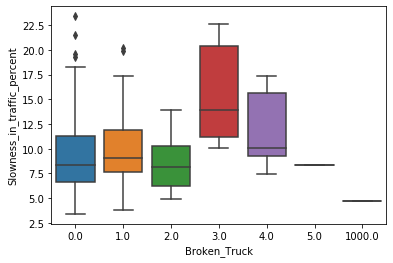

In [16]:
#Find outliers
import seaborn as sns
sns.boxplot(x = 'Broken_Truck', y = 'Slowness_in_traffic_percent', data = data_working)

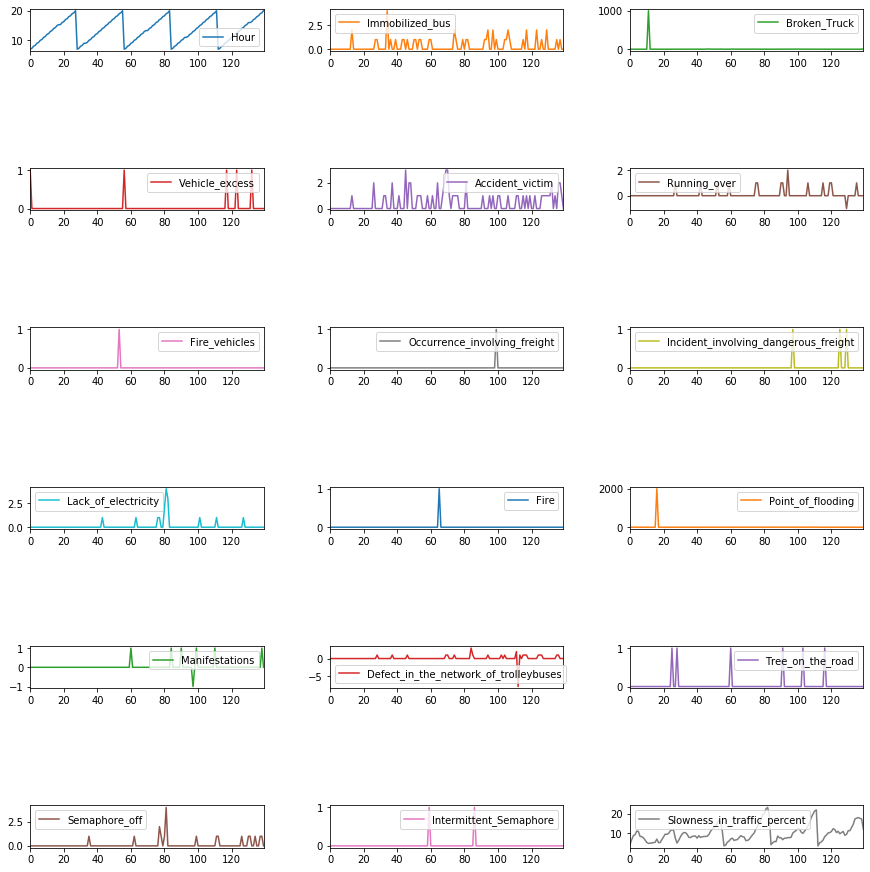

In [17]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize = (12,12))
data_working.plot(subplots=True, ax=axes.flatten()[:18])

#plt.set_tight_layout(True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=10.0)
plt.show()

From the above graphs, we are able to observe Broken_Truck, Point_of_Flooding has clear outliers.

Applying Z score to eliminate outliers
z = (x - mean(x))/SD

In [18]:
#Handling outliers
data_working_out = data_working[(np.abs(stats.zscore(data_working)) < 3).all(axis=1)]

1. For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
2. Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
3. all(axis=1) ensures that for each row, all column satisfy the constraint.
4. Finally, result of this condition is used to index the dataframe.

Normality Testing:
Skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean.
In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). 
The skewness value can be positive or negative, or even undefined. 
If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
As a general rule of thumb:
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [19]:
print(data_working_out.skew())

Hour                                    -0.014872
Immobilized_bus                          1.883690
Broken_Truck                             1.579209
Vehicle_excess                           0.000000
Accident_victim                          1.242526
Running_over                             2.797894
Fire_vehicles                            0.000000
Occurrence_involving_freight             0.000000
Incident_involving_dangerous_freight     0.000000
Lack_of_electricity                      3.871362
Fire                                     0.000000
Point_of_flooding                        9.696256
Manifestations                           0.000000
Defect_in_the_network_of_trolleybuses    2.758370
Tree_on_the_road                         0.000000
Semaphore_off                            3.002870
Intermittent_Semaphore                   0.000000
Slowness_in_traffic_percent              1.012805
dtype: float64


In [20]:
#Handling negative values
data_working[data_working < 0] = 0

Univariate Analysis

In [21]:
# Set the color coding for the visualizations to be plotted
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

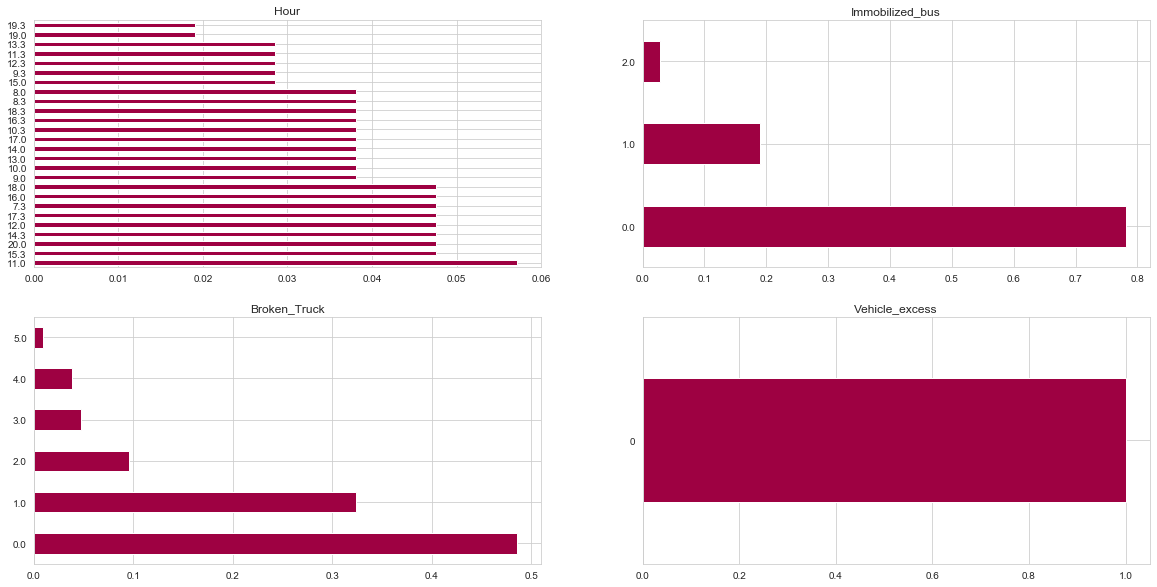

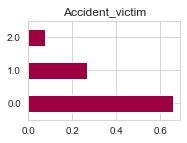

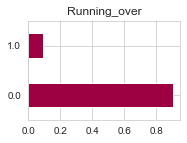

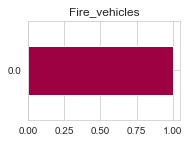

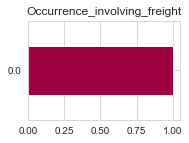

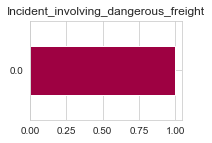

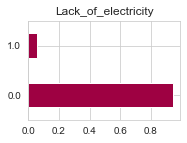

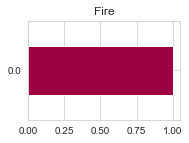

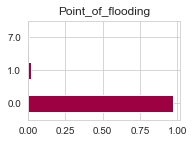

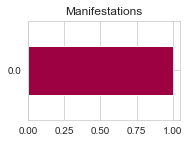

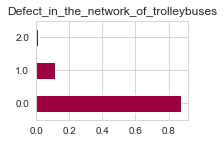

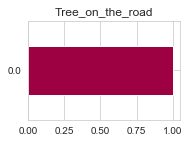

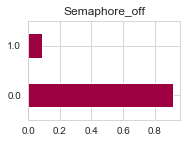

In [87]:
#Prepare a 2 by 2 layout two render these categorical attributes
plt.figure(1) 

plt.subplot(221) 
data_working_out['Hour'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'Hour') 

plt.subplot(222) 
data_working_out['Immobilized_bus'].value_counts(normalize=True).plot.barh(title= 'Immobilized_bus', cmap=cmap1) 

plt.subplot(223) 
data_working_out['Broken_Truck'].value_counts(normalize=True).plot.barh(title= 'Broken_Truck', cmap=cmap1) 

plt.subplot(224) 
data_working_out['Vehicle_excess'].value_counts(normalize=True).plot.barh(title= 'Vehicle_excess', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Accident_victim'].value_counts(normalize=True).plot.barh(title= 'Accident_victim', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Running_over'].value_counts(normalize=True).plot.barh(title= 'Running_over', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Fire_vehicles'].value_counts(normalize=True).plot.barh(title= 'Fire_vehicles', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Occurrence_involving_freight'].value_counts(normalize=True).plot.barh(title= 'Occurrence_involving_freight', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Incident_involving_dangerous_freight'].value_counts(normalize=True).plot.barh(title= 'Incident_involving_dangerous_freight', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Lack_of_electricity'].value_counts(normalize=True).plot.barh(title= 'Lack_of_electricity', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Fire'].value_counts(normalize=True).plot.barh(title= 'Fire', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Point_of_flooding'].value_counts(normalize=True).plot.barh(title= 'Point_of_flooding', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Manifestations'].value_counts(normalize=True).plot.barh(title= 'Manifestations', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Defect_in_the_network_of_trolleybuses'].value_counts(normalize=True).plot.barh(title= 'Defect_in_the_network_of_trolleybuses', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Tree_on_the_road'].value_counts(normalize=True).plot.barh(title= 'Tree_on_the_road', cmap=cmap) 
plt.show()

plt.subplot(224) 
data_working_out['Semaphore_off'].value_counts(normalize=True).plot.barh(title= 'Semaphore_off', cmap=cmap) 
plt.show()

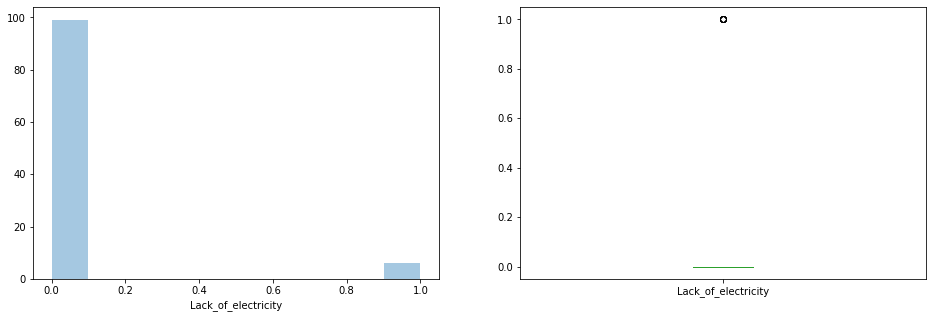

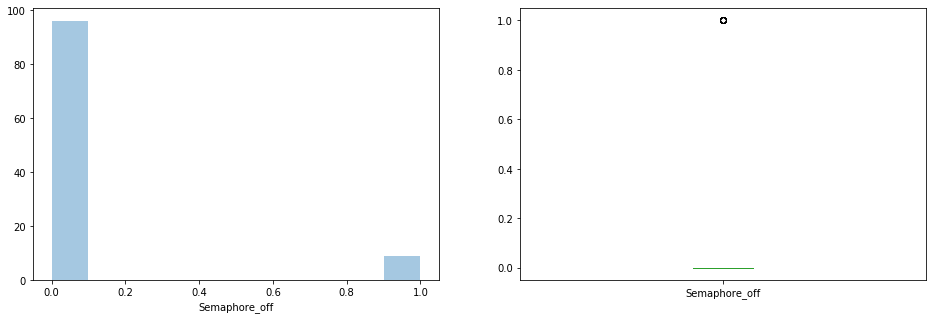

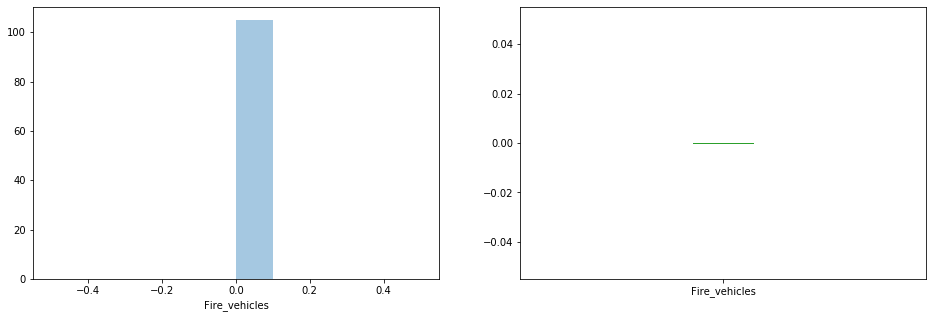

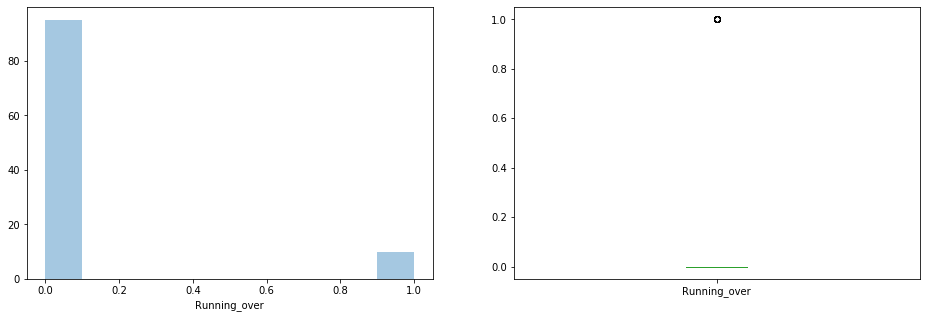

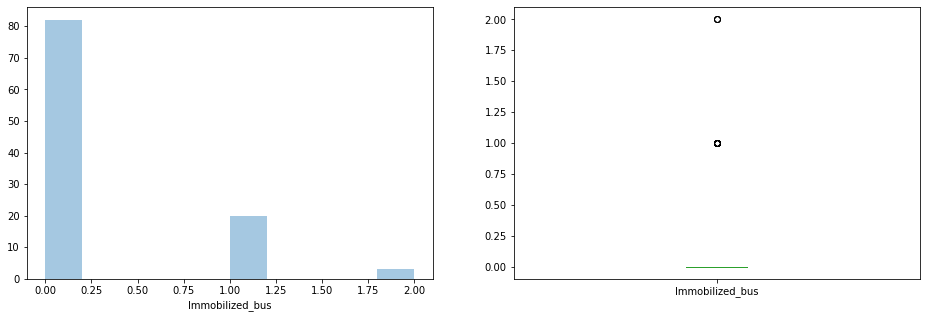

In [23]:
#Prepare a layout to render these numerical attributes
plt.figure(1) 
plt.subplot(121) 
sns.distplot(data_working_out['Lack_of_electricity'], hist=True, kde=False); 

plt.subplot(122) 
data_working_out['Lack_of_electricity'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(1) 
plt.subplot(121) 
sns.distplot(data_working_out['Semaphore_off'], hist=True, kde=False); 

plt.subplot(122) 
data_working_out['Semaphore_off'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(1) 
plt.subplot(121) 
sns.distplot(data_working_out['Fire_vehicles'], hist=True, kde=False); 

plt.subplot(122) 
data_working_out['Fire_vehicles'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(1) 
plt.subplot(121) 
sns.distplot(data_working_out['Running_over'], hist=True, kde=False); 

plt.subplot(122) 
data_working_out['Running_over'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(1) 
plt.subplot(121) 
sns.distplot(data_working_out['Immobilized_bus'], hist=True, kde=False); 

plt.subplot(122) 
data_working_out['Immobilized_bus'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(1) 
plt.subplot(121) 
sns.distplot(data_working_out['Immobilized_bus'], hist=True, kde=False); 

plt.subplot(122) 
data_working_out['Immobilized_bus'].plot.box(figsize=(16,5)) 
plt.show()

Bivariate Analysis

In [24]:
#Set the visuzalization style
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. 
The variables with darker color means their correlation is more.

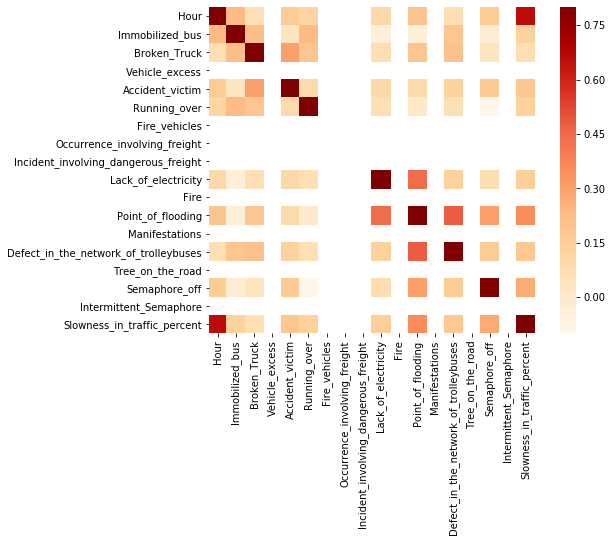

In [25]:
matrix = data_working_out.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="OrRd");

From above heatmap it is clear that there is correlation between target variable vs below variables.
'Hour', 'Broken_Truck', 'Defect_in_the_network_of_trolleybuses', 'Immobilized_bus', 'Point_of_flooding', 'Running_over'

However, let us validate with Filter Selection methods.

# 1.3 Filter Selection

As part of filter selection, we do the following steps:
1)As our target variable, slowness in the traffic percent is continuous we will try to apply the binning mechanism to find factors causing slowness in the traffic
2)Apply Chi square, F-Classification, RFE technique to find those factors

In [26]:
import seaborn as sns
sns.set_style('whitegrid')

In [27]:
print("max", max(data_working_out["Slowness_in_traffic_percent"]))
print("min", min(data_working_out["Slowness_in_traffic_percent"]))

max 22.1
min 3.8


In [28]:
data_binning = data_working_out.copy()

Text(0, 0.5, 'Frequency')

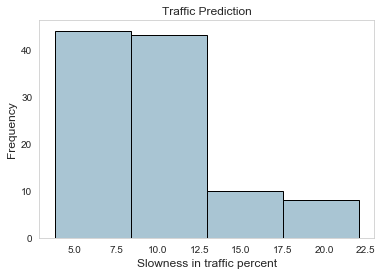

In [29]:
fig, ax = plt.subplots()
data_binning["Slowness_in_traffic_percent"].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False, bins=4)
ax.set_title('Traffic Prediction', fontsize=12)
ax.set_xlabel('Slowness in traffic percent', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [30]:
group_names = ['Low', 'Medium', 'High', 'VeryHigh']
data_binning['Slowness_in_traffic_percent_binned'] = pd.cut(data_binning["Slowness_in_traffic_percent"], 4, labels=group_names)
data_binning[['Slowness_in_traffic_percent','Slowness_in_traffic_percent_binned']].tail(10)

,Slowness_in_traffic_percent,Slowness_in_traffic_percent_binned
127,10.9,Medium
128,8.9,Medium
130,11.3,Medium
131,11.3,Medium
133,14.6,High
134,17.4,High
135,17.8,VeryHigh
136,18.1,VeryHigh
137,17.7,VeryHigh
139,12.1,Medium


In [31]:
data_binning = data_binning.drop(['Slowness_in_traffic_percent'], axis=1) 

In [32]:
#Function to find the factors using chi-square, F-Classification, Mutual Info classification
def show_top_univariate_filters(data, score_func, top_k):
    X = data.iloc[:,0:17]  #independent columns
    y = data.iloc[:,-1]    #target column
    
    actualX = np.array(X)
    actualy = np.array(y)
    
    if score_func == "chi2":
        func = chi2
    elif score_func == "f_classif":
        func = f_classif
    elif score_func == "mutual_info_classif":
        func = mutual_info_classif
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(actualX,actualy)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print 10 best features

In [33]:
show_top_univariate_filters(data_binning, 'chi2', 5)

                                    Specs      Score
11                      Point_of_flooding  85.500000
0                                    Hour  42.938611
13  Defect_in_the_network_of_trolleybuses  10.006342
2                            Broken_Truck   7.332065
1                         Immobilized_bus   6.526905


In [34]:
show_top_univariate_filters(data_binning, 'f_classif', 5)

                                    Specs      Score
0                                    Hour  22.415594
11                      Point_of_flooding   5.751249
13  Defect_in_the_network_of_trolleybuses   3.509401
1                         Immobilized_bus   2.272289
5                            Running_over   1.913027


# Feature Selection using RFE

In [35]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
X = data_binning.iloc[:,0:17]  #independent columns
y = data_binning.iloc[:,-1]    #target column
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print(sorted(zip(map(lambda x: round(x, 4), fit.ranking_), X.columns)))

Num Features: 5
Selected Features: [False  True  True False False  True False False False False False  True
 False  True False False False]
[(1, 'Broken_Truck'), (1, 'Defect_in_the_network_of_trolleybuses'), (1, 'Immobilized_bus'), (1, 'Point_of_flooding'), (1, 'Running_over'), (2, 'Semaphore_off'), (3, 'Accident_victim'), (4, 'Lack_of_electricity'), (5, 'Hour'), (6, 'Intermittent_Semaphore'), (7, 'Tree_on_the_road'), (8, 'Manifestations'), (9, 'Fire'), (10, 'Occurrence_involving_freight'), (11, 'Fire_vehicles'), (12, 'Vehicle_excess'), (13, 'Incident_involving_dangerous_freight')]


According to the RFE mechanism, below are the best features to be considered:
'Broken_Truck', 'Defect_in_the_network_of_trolleybuses', 'Immobilized_bus', 'Point_of_flooding', 'Running_over' 

# Model Building

# Using Linear/Polynomial Regression considering best factors

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

 As per RFE, Chi Square, F-Classify let us consider below columns:
 1)'Hour'
 2)'Broken_Truck'
 3)'Defect_in_the_network_of_trolleybuses'
 4)'Immobilized_bus'
 5)'Point_of_flooding'
 6) 'Running_over' 

In [39]:
columns_selected = ['Hour', 'Broken_Truck', 'Defect_in_the_network_of_trolleybuses', 'Immobilized_bus', 'Point_of_flooding', 'Running_over']

In [40]:
data_working_out.describe()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
count,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.0,105.0,105.0,105.000000,105.0,105.000000,105.0,105.000000,105.0,105.000000,105.0,105.000000
mean,13.561905,0.247619,0.857143,0.0,0.419048,0.095238,0.0,0.0,0.0,0.057143,0.0,0.085714,0.0,0.133333,0.0,0.085714,0.0,9.979048
std,3.742875,0.495770,1.121714,0.0,0.632166,0.294951,0.0,0.0,0.0,0.233229,0.0,0.694958,0.0,0.368643,0.0,0.281284,0.0,3.864177
min,7.300000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.800000
25%,10.300000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,7.400000
50%,14.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,9.200000
75%,17.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,11.400000
max,20.000000,2.000000,5.000000,0.0,2.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,7.000000,0.0,2.000000,0.0,1.000000,0.0,22.100000


In [41]:
data_for_model = data_working_out[['Hour', 'Broken_Truck', 'Defect_in_the_network_of_trolleybuses', 'Immobilized_bus', 'Point_of_flooding', 'Running_over']]

In [42]:
data_for_model.head(10)

,Hour,Broken_Truck,Defect_in_the_network_of_trolleybuses,Immobilized_bus,Point_of_flooding,Running_over
1,7.3,0.0,0.0,0.0,0.0,0.0
2,8.0,0.0,0.0,0.0,0.0,0.0
3,8.3,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0
5,9.3,0.0,0.0,0.0,0.0,0.0
6,10.0,0.0,0.0,0.0,0.0,0.0
7,10.3,0.0,0.0,0.0,0.0,0.0
8,11.0,0.0,0.0,0.0,0.0,0.0
9,11.3,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,0.0,0.0,0.0,0.0


In [76]:
X = data_for_model.iloc[:,:].values # copy all columns excluding last column

In [77]:
y = data_working_out[['Slowness_in_traffic_percent']]

In [78]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
print(X_train.shape)
print(X_test.shape)

(84, 6)
(21, 6)


In [80]:
reg = LinearRegression().fit(X_train,y_train)

In [81]:
print("Coefficient is: ", reg.coef_)
print("Intercept is: ", reg.intercept_)

Coefficient is:  [[ 0.61816174 -0.2028787   0.79252742 -0.25461767  1.13337805  0.48598337]]
Intercept is:  [1.67265361]


In [105]:
y_pred = reg.predict(X_train)
len(y_pred)

84

In [82]:
rmse = math.sqrt(mean_squared_error(reg.predict(X_test), y_test))
rse = (rmse**2)*X_test.shape[0]
rse /= X_test.shape[0] - 2
print("RMSE is: ", rmse)
print("RSE is: ", rse)
print("r2 error is: ", reg.score(X_test,y_test))

RMSE is:  2.4558102364922862
RSE is:  6.665846435308752
r2 error is:  0.5434837628967644


# Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [57]:
X = data_working_out.iloc[:,0:17]
y = data_working_out.iloc[:,-1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
reg = Lasso(alpha = 0.5)
reg.fit(X_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
rmse = math.sqrt(mean_squared_error(reg.predict(X_test), y_test))
rse = (rmse**2)*X_test.shape[0]
rse /= X_test.shape[0] - 2
print("RMSE is: ", rmse)
print("RSE is: ", rse)
print("r2 error is: ", reg.score(X_test,y_test))

RMSE is:  3.008096259835342
RSE is:  9.651885982331065
r2 error is:  0.518084148043779


# Model Evaluation

As per the above two results, Linear and Lasso regression, we have got almost same values for RMSE, RSE and R^2 values
1. The error component is very less 
2. R^2 value is nearing to 1 which determines the response variable is linearly related to independent variables. 
3. The selected feature subset is adequate for forecasting target variable
3. Less of RSE and R^2 towards 1 says that the model is a good model and linear regression is apt to this dataset.